# Regression Analysis
_Assignment 2 from Econometrics_

Date: 2019-10-24

In [1]:
defaultW <- getOption("warn")
options(warn = -1)

library(wooldridge)
library(tidyverse)
library(knitr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# attend Dataset
Documentation for the dataset 'attend' and later dataset 'htv' can be found [here](https://cran.r-project.org/web/packages/wooldridge/wooldridge.pdf).

## Max, Min, Average

Obtain the minimum, maximum, and average values for the variables atndrte (percent classes attended), priGPA (cumulative GPA prior to term), and ACT (ACT score). We will obtain the results using two different methods.

(1) Using Summarize

In [6]:
# download data into R
data("attend", wooldridge)

# first way using summarize
attend %>% 
    summarize(
        atndrte_min = min(atndrte), 
        priGPA_min=min(priGPA), 
        ACT_min = min(ACT), 
        atndrte_max = max(atndrte), 
        priGPA_max = max(priGPA), 
        ACT_max = max(ACT), 
        atndrte_mean = mean(atndrte), 
        priGPA_mean = mean(priGPA), 
        ACT_mean = mean(ACT)) %>% 
    round(., 3) %>% 
    gather(" ", ".") %>% kable()

Warning message in data("attend", wooldridge):
“data set ‘wooldridge’ not found”




|             |       .|
|:------------|-------:|
|atndrte_min  |   6.250|
|priGPA_min   |   0.857|
|ACT_min      |  13.000|
|atndrte_max  | 100.000|
|priGPA_max   |   3.930|
|ACT_max      |  32.000|
|atndrte_mean |  81.710|
|priGPA_mean  |   2.587|
|ACT_mean     |  22.510|

(2) Using select and summary

In [7]:
# second way using select and summary
attend %>% select(atndrte, priGPA, ACT) %>% summary() %>% kable()



|   |   atndrte     |    priGPA    |     ACT      |
|:--|:--------------|:-------------|:-------------|
|   |Min.   :  6.25 |Min.   :0.857 |Min.   :13.00 |
|   |1st Qu.: 75.00 |1st Qu.:2.190 |1st Qu.:20.00 |
|   |Median : 87.50 |Median :2.560 |Median :22.00 |
|   |Mean   : 81.71 |Mean   :2.587 |Mean   :22.51 |
|   |3rd Qu.: 93.75 |3rd Qu.:2.942 |3rd Qu.:25.00 |
|   |Max.   :100.00 |Max.   :3.930 |Max.   :32.00 |

## Estimate model

Estimate the model $$atndrte = \beta_0 + \beta_1 priGPA + \beta_2 ACT + u$$, to make it easier create an object with the model and then show the summary. 

In [8]:
mc4<-lm(formula = atndrte ~ priGPA + ACT, attend)

summary(mc4)


Call:
lm(formula = atndrte ~ priGPA + ACT, data = attend)

Residuals:
    Min      1Q  Median      3Q     Max 
-65.373  -6.765   2.125   9.635  29.615 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   75.700      3.884   19.49   <2e-16 ***
priGPA        17.261      1.083   15.94   <2e-16 ***
ACT           -1.717      0.169  -10.16   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.38 on 677 degrees of freedom
Multiple R-squared:  0.2906,	Adjusted R-squared:  0.2885 
F-statistic: 138.7 on 2 and 677 DF,  p-value: < 2.2e-16


## Comparing Results of Averages

(1) Calculate the predicted atndrte for all values and the mean of it. 

In [9]:
# first method
(meanyhat = mean(fitted(mc4)))

[1] 81.70956

(2) Calculate the predicted value of atndrte for the average values of the independent variables.

In [10]:
# second method
means <- data.frame(priGPA = mean(attend$priGPA), ACT = mean(attend$ACT))

(yhatmeans <- predict(mc4, means))

1 
81.70956

*Compare results.*

The results are the same. The first method finds the mean of all the fitted values, which means the values that are on the line that minimizes the amount of squared residual, where y = atndrte and $x_1$ = priGPA and $x_2$ = ACT. Naturally, that would get the mean of $\hat{y}$.

The second method first finds the mean of all the values of priGPA and ACT and then predicts the means within the linear model created in mc4. Both methods use different steps to arrive at the same conclusion for the mean of $\hat{y}$.


## Predicted y Value

(1) What is the predicted atndrte if priGPA = 3.65 and ACT = 20? 

(2) What is the predicted difference in attendant rates between this and the one for the average independent variables calculated above?

For this case, I will not use the predict function for your code.

Retrive the coeffients and calculate the equation:

$$atndrte = \hat\beta_0 + \hat\beta_1 3.65 + \hat\beta_2 20 + u$$

In [11]:
yhat2 <- mc4$coefficients[1] + mc4$coefficients[2]*3.65+ mc4$coefficients[3]*20
names(yhat2)<-NULL # removes the names 
print(paste0("yhat = ", round((yhat2), 3)))
print(paste0("Difference = ", round((yhat2-yhatmeans), 3)))

[1] "yhat = 104.371"
[1] "Difference = 22.661"


## Freshman and Sophomore Models

(1) Run two more models one only for freshman another one only for sophomore.

(2) Save the results in objects mfr, msoph respectibly

Freshman Model

In [13]:
mfr <- lm(formula = atndrte ~ priGPA + ACT, attend, frosh == 1)
mfr


Call:
lm(formula = atndrte ~ priGPA + ACT, data = attend, subset = frosh == 
    1)

Coefficients:
(Intercept)       priGPA          ACT  
     76.507       16.062       -1.487  


Sophomore Model

In [14]:
msoph <- lm(formula = atndrte ~ priGPA + ACT, attend, soph == 1)

## Table

The table below compares $\beta's$, $R^2$ and observations for the models estimated. 

Variables | All | Freshmen | Sophomore
----------|-----|----------|----------
$\beta_0$ | `r round(mc4$coefficient[1], 3)` | `r round(mfr$coefficient[1],3)`| `r round(msoph$coefficient[1],3)`
$\beta_1$ | `r round(mc4$coefficient[2],3)` | `r round(mfr$coefficient[2],3)`| `r round(msoph$coefficient[2],3)`
$\beta_2$ | `r round(mc4$coefficient[3],3)` | `r round(mfr$coefficient[3],3)`| `r round(msoph$coefficient[3],3)`
$R^2$ | `r round(summary(mc4)$r.squared,3)` | `r round(summary(mfr)$r.squared, 3)`| `r round(summary(msoph)$r.squared,3)`
$N$ | `r nobs(mc4)`| `r nobs(mfr)`| `r nobs(msoph)` 

## Correlations

Calculate the correlation between the residuals and the priGPA for the first model. 

In [15]:
round(cor(mc4$residuals, attend$priGPA),10)

[1] 0

# HTV Dataset

The HTV data set includes information on wages, education, parents’ education, and several other variables for 1,230 working men in 1991. 

## Range, Percentages, Average 

I will answer the following questions:

(1) What is the range of the educ variable in the sample?
(2) What percentage of men completed twelfth grade but no higher grade?
(3) Do the men or their parents have, on average, higher levels of education?

In [17]:
data("htv", wooldridge)

# summary provides the mean and max of the variable therefore the range
summary(htv$educ)

# the mean of the logical expression gives the percentage of men that completed 12th grade but not higher.

print(paste0("Percentage of men with HS= ", round((mean(htv$educ==12)), 3)))

# See answers assignment 1 for this 
htv %>% 
    select(educ, motheduc,fatheduc) %>% 
    summarise_all(mean) %>% gather() %>% 
    setNames(., c(" ", "Average")) %>% 
    kable(digits=3)

Warning message in data("htv", wooldridge):
“data set ‘wooldridge’ not found”


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   6.00   12.00   12.00   13.04   15.00   20.00 

[1] "Percentage of men with HS= 0.416"




|         | Average|
|:--------|-------:|
|educ     |  13.037|
|motheduc |  12.178|
|fatheduc |  12.447|

## Regression Model

(1) Estimate the regression model $$educ = \beta_0 + \beta_1motheduc + \beta_2fatheduc + u$$ by OLS and report the results in the usual form. 

In [18]:
# model 1
model1 <- lm(educ ~ motheduc + fatheduc, htv)
summary(model1)


Call:
lm(formula = educ ~ motheduc + fatheduc, data = htv)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.2898 -0.9400 -0.4037  1.1239  8.1672 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.96435    0.31982  21.776   <2e-16 ***
motheduc     0.30420    0.03193   9.528   <2e-16 ***
fatheduc     0.19029    0.02228   8.539   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.042 on 1227 degrees of freedom
Multiple R-squared:  0.2493,	Adjusted R-squared:  0.248 
F-statistic: 203.7 on 2 and 1227 DF,  p-value: < 2.2e-16


(2) Add the variable abil (a measure of cognitive ability) to the regression from part (ii), and report the results in equation form. 

In [19]:
# model 2
model2 <- lm(educ ~ motheduc + fatheduc + abil, htv)
summary(model2)


Call:
lm(formula = educ ~ motheduc + fatheduc + abil, data = htv)

Residuals:
   Min     1Q Median     3Q    Max 
-5.407 -1.195 -0.199  1.076  7.012 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.44869    0.28954  29.180  < 2e-16 ***
motheduc     0.18913    0.02851   6.635 4.87e-11 ***
fatheduc     0.11109    0.01988   5.586 2.85e-08 ***
abil         0.50248    0.02572  19.538  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.784 on 1226 degrees of freedom
Multiple R-squared:  0.4275,	Adjusted R-squared:  0.4261 
F-statistic: 305.2 on 3 and 1226 DF,  p-value: < 2.2e-16


(3) Now estimate an equation where abil appears in quadratic form

In [21]:
# model3
model3 <- lm(educ ~ motheduc + fatheduc + abil + I(abil^2), htv)
summary(model3)


Call:
lm(formula = educ ~ motheduc + fatheduc + abil + I(abil^2), data = htv)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.2506 -1.1274 -0.1355  1.0223  7.0482 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 8.240226   0.287410  28.671  < 2e-16 ***
motheduc    0.190126   0.028096   6.767 2.03e-11 ***
fatheduc    0.108939   0.019601   5.558 3.35e-08 ***
abil        0.401462   0.030288  13.255  < 2e-16 ***
I(abil^2)   0.050599   0.008304   6.093 1.48e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.758 on 1225 degrees of freedom
Multiple R-squared:  0.4444,	Adjusted R-squared:  0.4425 
F-statistic: 244.9 on 4 and 1225 DF,  p-value: < 2.2e-16


Follow-up questions:

(1) How much sample variation in educ is explained by parents’ education? Interpret the coefficient on motheduc.

Parent's education explains `r round(summary(model1)$r.squared,3)` of the variation in education. `r round(model1$coefficient["motheduc"],3)`

(2) Does “ability” help to explain variations in education, even after controlling for parents’ education? Explain.

Yes, because for every unit of increase in "ability", a person's years of education increases by `r round(model2$coefficient['abil'],3)`, whereas for mother's education and father's education a person's years of education only increases by less than 0.2 (`r round(model2$coefficient['motheduc'],3) ` and `r round(model2$coefficient['fatheduc'],3)` respectively). Because the coefficient for ability is higher than the coefficients for mother and father's education, therefore, ability explains more of the variation.

(3) Use estimates to graph relationship between predicted education and abil
* Set motheduc and fatheduc at their average values in the sample, 12.18 and 12.45, respectively.

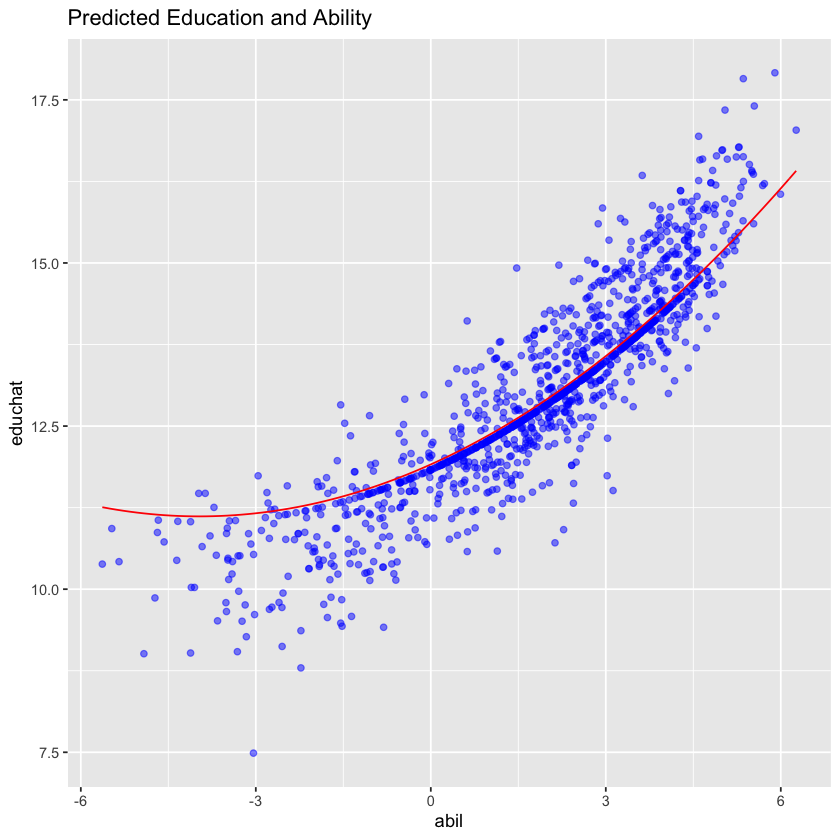

In [22]:
dat <- data.frame(educhat=predict(model3), abil=htv$abil)
plot <- ggplot(dat, aes(x=abil, y=educhat)) + # mapping x and y 
            geom_point(col=4, alpha=.5) + # scatter plot defining atributes for color and transparency
            stat_function(
            fun = function(abil){
                (12.18*model3$coefficients['motheduc']) + 
                (12.45*model3$coefficients['fatheduc']) + 
                (abil*model3$coefficients['abil']) + 
                I(abil^2)*model3$coefficients['I(abil^2)'] + 
                model3$coefficients[1]
            }, 
        geom="line", col=2) + # plot the function of the relation between educ and ability
        ggtitle(paste("Predicted Education and Ability")) # title of the graph
print(plot)